# ABS Inflation multi-measure

## Python set-up

In [1]:
# system imports
from io import StringIO
from typing import cast

# analytic imports
import pandas as pd
import sdmxabs as sa
import mgplot as mg

In [2]:
# save charts in this notebook
CHART_DIR = "./CHARTS/Inflation-sdmx/"
mg.set_chart_dir(CHART_DIR)
mg.clear_chart_dir()

# display charts in this notebook
SHOW = False

## Exploratory data analysis

### Data flows

In [3]:
# search data flows for the National Accounts data
dflows = sa.data_flows()  # returns more than 1200 rows, each a data flow.
dflows[dflows.name.str.contains("National Accounts")].sort_values("name").head(10)

,agencyID,version,isFinal,name
dataflows,,,,
ANA_EXP,ABS,1.0.0,true,Australian National Accounts - Expenditure on ...
ANA_SFD,ABS,1.0.0,true,Australian National Accounts - State Final Demand
ANA_AGG,ABS,1.0.0,true,Australian National Accounts Key Aggregates
ANA_INC,ABS,1.0.0,true,Australian National Accounts – Income from Gro...
ANA_IND_GVA,ABS,1.0.0,true,Australian National Accounts – Production of G...


In [4]:
# And lets look for data flows that are a price index
dflows[dflows.name.str.contains("Price Index")].sort_values("name").head(10)

,agencyID,version,isFinal,name
dataflows,,,,
CPI,ABS,1.1.0,true,Consumer Price Index (CPI) 17th Series
CPI_WEIGHTS,ABS,1.0.0,true,Consumer Price Index (CPI) Weights
ITPI_EXP,ABS,1.0.0,true,Export Price Index
ITPI_IMP,ABS,1.0.0,true,Import Price Index
CPI_M,ABS,1.2.0,true,Monthly Consumer Price Index (CPI) indicator
PPI,ABS,1.1.3,true,Producer Price Indexes by Industry
PPI_FD,ABS,1.1.0,true,"Producer Price Indexes, Final Demand"
RPPI,ABS,1.0.0,true,Residential Property Price Index
WPI,ABS,1.2.0,true,Wage Price Index


### Data dimensions

In [5]:
# check out the data dimensions for the Expenditure GDP data
sa.data_dimensions("ANA_EXP")

,position,id,version,agencyID,package,class
dimensions,,,,,,
MEASURE,1,CL_ANA_MEASURE,1.0.0,ABS,codelist,Codelist
DATA_ITEM,2,CL_ANA_EXP_ITEMS,0.0.3,ABS,codelist,Codelist
SECTOR,3,CL_ANA_SECTOR,1.0.0,ABS,codelist,Codelist
TSEST,4,CL_TSEST,1.0.0,ABS,codelist,Codelist
REGION,5,CL_STATE,1.0.0,ABS,codelist,Codelist
FREQ,6,CL_FREQ,1.0.0,ABS,codelist,Codelist


In [6]:
# The dimensions for the Consumer Price Index data are different,
# and draw on different code lists for some dimensions.
sa.data_dimensions("CPI")

,position,id,version,agencyID,package,class
dimensions,,,,,,
MEASURE,1,CL_CPI_MEASURES,1.0.0,ABS,codelist,Codelist
INDEX,2,CL_CPI_INDEX_17,1.1.0,ABS,codelist,Codelist
TSEST,3,CL_TSEST,1.0.0,ABS,codelist,Codelist
REGION,4,CL_CPI_REGION,1.0.0,ABS,codelist,Codelist
FREQ,5,CL_FREQ,1.0.0,ABS,codelist,Codelist


### Code lists

In [7]:
# check out a specific code list for the Expenditure GDP data
sa.code_lists("CL_ANA_SECTOR")

,name
CL_ANA_SECTOR,
GEC,Public corporations - Commonwealth
GES,Public corporations
GES_SL,Public corporations - State and local
GFS,Public financial corporations
GGC,General government - National
GGD,General government - National - Defence
GGM,General government - Multijurisdictional
GGS,General government
GGS_SL,General government - State and local


In [8]:
# check out a specific code list for the Expenditure GDP data
sa.code_lists("CL_ANA_MEASURE")

,name
CL_ANA_MEASURE,
C,Current prices
DCH,Implicit price deflators
FCH,Chain price indexes
ICH,Index
PCT_C,Current prices - Percentage Changes
PCT_DCH,Implicit price deflators - Percentage changes
PCT_FCH,Chain price indexes - Percentage Changes
PCT_ICH,Index - Percentage changes
PCT_RC,Current prices - Revisions to Percentage Changes


In [9]:
# check out a specific code list for the Expenditure GDP data
sa.code_lists("CL_STATE")

,name,parent
CL_STATE,,
1,New South Wales,AUS
2,Victoria,AUS
3,Queensland,AUS
4,South Australia,AUS
5,Western Australia,AUS
6,Tasmania,AUS
7,Northern Territory,AUS
8,Australian Capital Territory,AUS
9,Other Territories,AUS


In [10]:
sa.code_lists("CL_CPI_REGION")

,name,parent
CL_CPI_REGION,,
1,Sydney,50
2,Melbourne,50
3,Brisbane,50
4,Adelaide,50
5,Perth,50
50,Weighted average of eight capital cities,NaN
6,Hobart,50
7,Darwin,50
8,Canberra,50


### A quick extraction to look at metadata

In [11]:
# fetch one of the data flows and look at the meta data
flow_id = "ANA_EXP"
dimensions = {
    "MEASURE": "DCH",   # Implicit Price Deflators
    "DATA_ITEM": "FCE", # Final Consumption Expenditure
    "TSEST": "20",      # Seasonally Adjusted
    "REGION": "AUS",    # Australia
}
data, meta = sa.fetch(flow_id, dims=dimensions, validate=True)

# A quick look at the meta data - noting multiple items selected.
meta

Unspecified dimensions for ANA_EXP: ['SECTOR', 'FREQ'] (will global match)


,MEASURE,DATA_ITEM,SECTOR,TSEST,REGION,FREQ,UNIT_MEASURE,UNIT_MULT
DCH.FCE.PHS.20.AUS.Q.IN.0,Implicit price deflators,Final consumption expenditure,Households,Seasonally Adjusted,Australia,Quarterly,IN,0
DCH.FCE.GGC.20.AUS.Q.IN.0,Implicit price deflators,Final consumption expenditure,General government - National,Seasonally Adjusted,Australia,Quarterly,IN,0
DCH.FCE.SSS.20.AUS.Q.IN.0,Implicit price deflators,Final consumption expenditure,All sectors,Seasonally Adjusted,Australia,Quarterly,IN,0
DCH.FCE.GGS_SL.20.AUS.Q.IN.0,Implicit price deflators,Final consumption expenditure,General government - State and local,Seasonally Adjusted,Australia,Quarterly,IN,0
DCH.FCE.GGS.20.AUS.Q.IN.0,Implicit price deflators,Final consumption expenditure,General government,Seasonally Adjusted,Australia,Quarterly,IN,0


## Download selected ABS series

In [12]:
# from the above exploration, we found the following 
# data flows of interest. Irrelevant values are indicated with
# a dash (-) in the selection table below. These will
# be ignored when constructing the key to fectch the data.
text = """
flow_id, MEASURE, INDEX, TSEST, REGION, DATA_ITEM, SECTOR
CPI_M,         3, 10001,    10,     50,         -,      -
CPI_M,         3, 999905,   10,     50,         -,      -
CPI,           3, 10001,    10,     50,         -,      -
CPI,           3, 999902,   20,     50,         -,      -
CPI,           3, 999903,   20,     50,         -,      -
ANA_EXP,     DCH,      -,   20,    AUS,       FCE,    PHS
"""
selection = pd.read_csv(StringIO(text), dtype=str, skipinitialspace=True)
selection

,flow_id,MEASURE,INDEX,TSEST,REGION,DATA_ITEM,SECTOR
0,CPI_M,3,10001,10,50,-,-
1,CPI_M,3,999905,10,50,-,-
2,CPI,3,10001,10,50,-,-
3,CPI,3,999902,20,50,-,-
4,CPI,3,999903,20,50,-,-
5,ANA_EXP,DCH,-,20,AUS,FCE,PHS


In [ ]:
# Now lets fetch the data for each row in the above selection table.

def extract(dims: pd.DataFrame) -> tuple[pd.DataFrame, pd.Period]:
    """Extracts the data and metadata for each row in the dimensions DataFrame.
       Assumes that that each row will only fetch one ABS data series.
    
    Args:
        dims (pd.DataFrame): DataFrame containing the dimensions to fetch.
        
    Returns:
        tuple[pd.DataFrame, pd.Period]: A DataFrame with the fetched data and
                                        a starting point about 2 years ago that
                                        is on a quarterly boundary."""

    box = {}
    two_years_ago: pd.Period = pd.Timestamp.now().to_period("M") - 25
    for _index, row in selection.iterrows():
        row_dict: dict[str, str] = row.to_dict()
        flow_id = row_dict.pop("flow_id", "")
        if not flow_id:
            # --- if there is no flow_id, we will skip this row
            print(f"Skipping row with no flow_id: {row_dict}")
            continue

        # --- fetch the data and meta data for each row of the selection table
        try:
            data, meta = sa.fetch(flow_id, dims=row_dict, validate=False)
        except (sa.CacheError, sa.HttpError, ValueError) as e:
            # --- if there is an error, we will skip this row
            print(f"Error fetching {flow_id} with dimensions {row_dict}: {e}")
            continue
        if len(meta) > 1:
            # --- if there is more than one row of meta data, we will skip this row
            print(f"Multiple meta rows for {flow_id} with dimensions {row_dict}")
            continue
        if data.empty or meta.empty:
            # --- this should nto happen, but if it does, we will skip this row
            print(f"No data for {flow_id} with dimensions {row_dict}")
            continue
        
        data_series = data[data.columns[0]].astype(float)
        meta_series = meta.iloc[0]
        if "INDEX" in meta.columns:
            # --- General case for most of my specified selections.
            #     The fetch returned a single column of data
            #     and a single row of metadata.
            name = f"{meta_series['FREQ']} {meta_series['INDEX']} ({meta_series['TSEST']})"
        else:
            # --- Household Final Consumption Expenditure is a special case
            #     The fetch returned an index, and I want through the year percentage change
            #     Also, the meta data is different in this case, for the name
            data_series = data_series.pct_change(periods=4) * 100
            name = (
                f"{meta_series['FREQ']} {meta_series['SECTOR']} "
                + f"{meta_series['DATA_ITEM']} ({meta_series['TSEST']})"
            )

        # --- Convert quaterly data to monthly so we can plot on the same chart
        if meta_series['FREQ'] == "Quarterly":
            index = cast(pd.PeriodIndex, data_series.index).to_timestamp(how='end').to_period('M')
            data_series.index = index
            # --- get a starting point for the recent chart
            two_years_ago = data_series.index[-9]

        # --- put the data into a python dictionary
        box[name] = data_series.rename(name)

    return pd.DataFrame(box), cast(pd.Period, two_years_ago)

## Plot the data

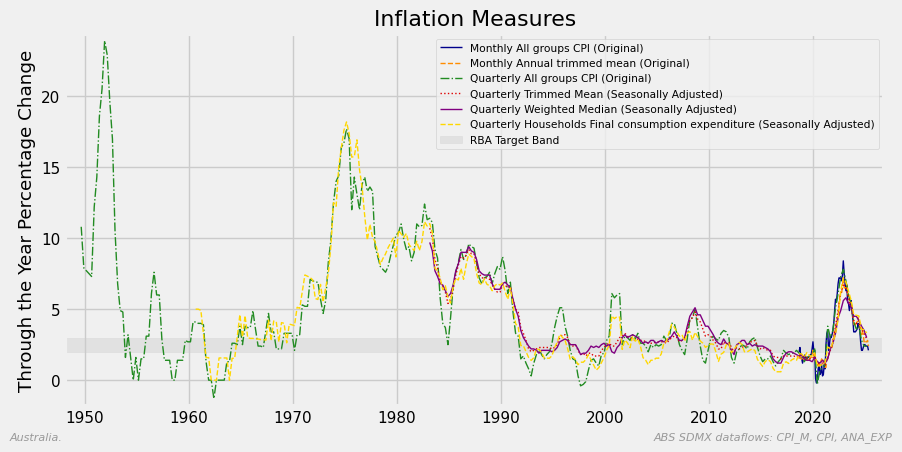

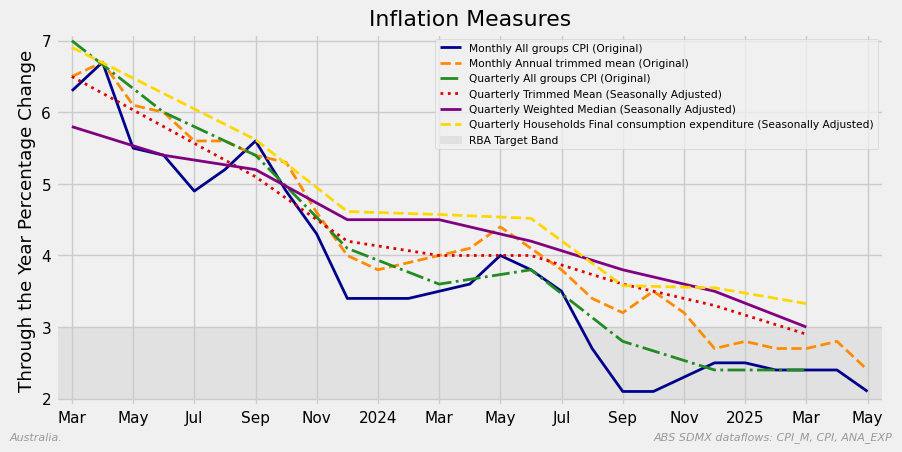

In [14]:
frame, recent = extract(selection)
mg.multi_start(
    frame,
    starts=(0, recent),
    function=mg.line_plot_finalise,
    title="Inflation Measures",
    ylabel="Through the Year Percentage Change",
    axhspan={"ymin": 2, "ymax": 3, "color": "lightgrey", "alpha": 0.5, "label": "RBA Target Band", "zorder": -1},
    legend={"loc": "best", "ncol": 1, "fontsize": "x-small"},
    #marker=list("<>^vosD"),
    #markersize=100,
    lfooter="Australia. ",
    rfooter=f"ABS SDMX dataflows: {', '.join(selection['flow_id'].unique())}",
    show=True,
)

## Finished

In [15]:
# watermark
%load_ext watermark
%watermark -u -t -d --iversions --watermark --machine --python --conda

Last updated: 2025-07-06 13:50:54

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 9.4.0

conda environment: n/a

Compiler    : Clang 20.1.4 
OS          : Darwin
Release     : 24.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 14
Architecture: 64bit

sdmxabs: 0.1.0
mgplot : 0.2.6
typing : 3.10.0.0
pandas : 2.3.0

Watermark: 2.5.0



In [16]:
print("Finished")

Finished
